In [138]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv("Car_price.csv")

In [140]:
df['Model'].nunique()

2736

In [141]:
df['Make'].nunique()

58

In [142]:
df.isna().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [143]:
df.duplicated().sum()

np.int64(30)

In [144]:
df.drop_duplicates(inplace=True)

In [145]:
df['Age']=2025-df['Year']

In [146]:
df.drop(columns='Vin',inplace=True)

In [147]:
df.describe()

,Price,Year,Mileage,Age
count,852092.000000,852092.000000,8.520920e+05,852092.000000
mean,21464.323952,2013.289097,5.250825e+04,11.710903
std,13596.350808,3.415016,4.198932e+04,3.415016
min,1500.000000,1997.000000,5.000000e+00,7.000000
25%,13000.000000,2012.000000,2.383600e+04,9.000000
50%,18500.000000,2014.000000,4.025600e+04,11.000000
75%,26995.000000,2016.000000,7.218700e+04,13.000000
max,499500.000000,2018.000000,2.856196e+06,28.000000


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852092 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852092 non-null  int64 
 1   Year     852092 non-null  int64 
 2   Mileage  852092 non-null  int64 
 3   City     852092 non-null  object
 4   State    852092 non-null  object
 5   Make     852092 non-null  object
 6   Model    852092 non-null  object
 7   Age      852092 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 58.5+ MB


In [149]:
df['State'].unique()

array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
       ' VT', ' SD', ' IA', ' RI', ' ga', ' Oh', ' MT', ' DC', ' AK',
       ' Va', ' WY', ' Md', ' Ca', ' Ga'], dtype=object)

In [150]:
df['City'].nunique()

2553

In [151]:
state_expanded= {
    'TX': 'Texas', 'NY': 'New York', 'CO': 'Colorado', 'UT': 'Utah',
    'FL': 'Florida', 'CT': 'Connecticut', 'ID': 'Idaho', 'ND': 'North Dakota',
    'CA': 'California', 'NJ': 'New Jersey', 'OH': 'Ohio', 'VA': 'Virginia',
    'IN': 'Indiana', 'AZ': 'Arizona', 'OR': 'Oregon', 'KS': 'Kansas',
    'NE': 'Nebraska', 'MA': 'Massachusetts', 'MD': 'Maryland',
    'GA': 'Georgia', 'MN': 'Minnesota', 'HI': 'Hawaii', 'LA': 'Louisiana',
    'NM': 'New Mexico', 'IL': 'Illinois', 'AL': 'Alabama',
    'PA': 'Pennsylvania', 'SC': 'South Carolina', 'NC': 'North Carolina',
    'WA': 'Washington', 'WI': 'Wisconsin', 'OK': 'Oklahoma',
    'KY': 'Kentucky', 'MS': 'Mississippi', 'MO': 'Missouri',
    'ME': 'Maine', 'AR': 'Arkansas', 'MI': 'Michigan',
    'NV': 'Nevada', 'TN': 'Tennessee', 'NH': 'New Hampshire',
    'DE': 'Delaware', 'WV': 'West Virginia', 'VT': 'Vermont',
    'SD': 'South Dakota', 'IA': 'Iowa', 'RI': 'Rhode Island',
    'MT': 'Montana', 'DC': 'District of Columbia', 'AK': 'Alaska',
    'WY': 'Wyoming'
}


In [152]:
df['STATE'] = df['State'].str.strip().str.upper().map(state_expanded)

In [153]:
df.drop(columns='State',inplace=True)

In [154]:
df.rename(columns={'Make': 'Company'}, inplace=True)


In [155]:
df.rename(columns={'STATE': 'State'}, inplace=True)


In [156]:
df.rename(columns={'Mileage': 'Km_driven'}, inplace=True)


In [157]:
df.columns

Index(['Price', 'Year', 'Km_driven', 'City', 'Company', 'Model', 'Age',
       'State'],
      dtype='object')

Boxplot of Price


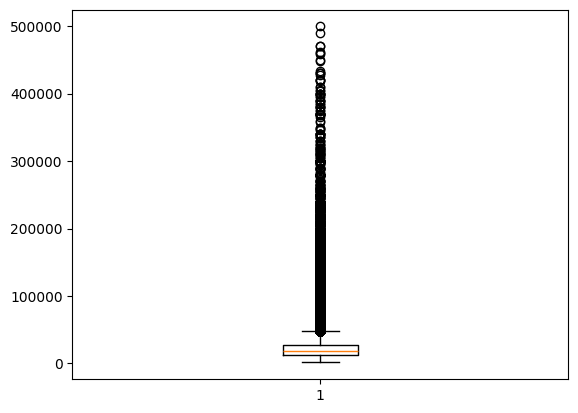

Boxplot of Year


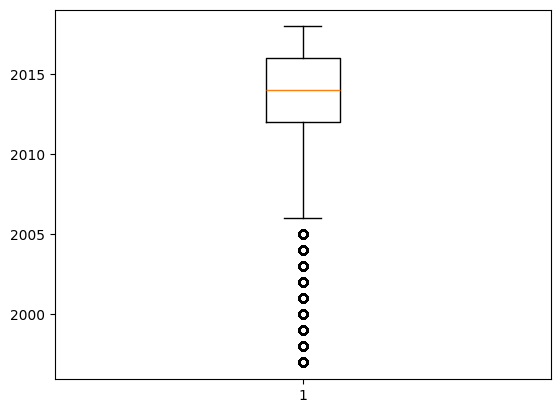

Boxplot of Km_driven


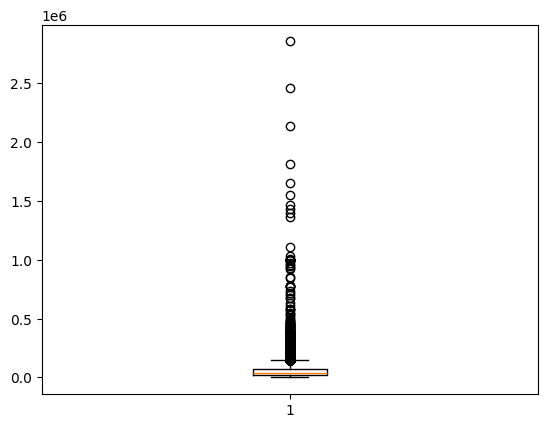

Boxplot of Age


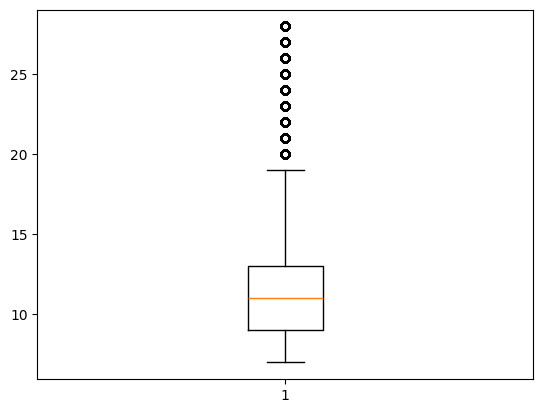

In [158]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
        print(f"Boxplot of {i}")
        plt.boxplot(df[i])
        plt.show()

In [159]:
df.loc[df['Age']>20]

,Price,Year,Km_driven,City,Company,Model,Age,State
97,8572,2004,51293,Fairfax,Acura,TSXAutomatic,21,Virginia
821,8195,2004,71572,Streamwood,Acura,TSXAutomatic,21,Illinois
1000,7995,2004,80404,Houston,Acura,TSXAutomatic,21,Texas
1282,5995,2004,116690,Fredericksburg,Acura,TSXAutomatic,21,Virginia
1311,6985,2004,106252,North Hollywood,Acura,TSXAutomatic,21,California
...,...,...,...,...,...,...,...,...
851771,4990,1998,96543,Fairfax,Volvo,S704dr,27,Virginia
851774,3999,1998,109198,Longmont,Volvo,S704dr,27,Colorado
851804,5000,1999,149857,Bremerton,Volvo,V70A,26,Washington
851925,3111,2001,202691,Odessa,Volvo,V702.4,24,Texas


In [160]:
df["Km_driven"].describe()


count    8.520920e+05
mean     5.250825e+04
std      4.198932e+04
min      5.000000e+00
25%      2.383600e+04
50%      4.025600e+04
75%      7.218700e+04
max      2.856196e+06
Name: Km_driven, dtype: float64

In [161]:
df = df[df["Km_driven"] <= 800000]

In [162]:
df["Price"].describe()

count    852053.000000
mean      21464.628950
std       13596.094943
min        1500.000000
25%       13000.000000
50%       18500.000000
75%       26995.000000
max      499500.000000
Name: Price, dtype: float64

In [163]:
df.loc[df['Price']>200000]

,Price,Year,Km_driven,City,Company,Model,Age,State
11252,205488,2017,783,Mt. Juliet,Aston,Martin,8,Tennessee
11253,204950,2015,1028,Bellevue,Aston,Martin,10,Washington
11254,209874,2017,3492,Greensboro,Aston,Martin,8,North Carolina
11255,212993,2017,7028,West Palm Beach,Aston,Martin,8,Florida
11256,219999,2017,1847,Downers Grove,Aston,Martin,8,Illinois
...,...,...,...,...,...,...,...,...
724004,339951,2017,1736,West Palm Beach,Rolls-Royce,DawnConvertible,8,Florida
724005,339888,2015,12869,Costa Mesa,Rolls-Royce,Phantom,10,California
724006,358880,2015,3694,Fort Lauderdale,Rolls-Royce,Phantom,10,Florida
724007,379995,2014,4798,Dallas,Rolls-Royce,PhantomSedan,11,Texas


In [164]:
df = df[df["Price"] <= 200000]

In [165]:
df.shape

(851711, 8)

In [166]:
df

,Price,Year,Km_driven,City,Company,Model,Age,State
0,8995,2014,35725,El Paso,Acura,ILX6-Speed,11,Texas
1,10888,2013,19606,Long Island City,Acura,ILX5-Speed,12,New York
2,8995,2013,48851,El Paso,Acura,ILX6-Speed,12,Texas
3,10999,2014,39922,Windsor,Acura,ILX5-Speed,11,Colorado
4,14799,2016,22142,Lindon,Acura,ILXAutomatic,9,Utah
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,Volvo,S90T6,8,California
852118,72260,2017,3201,Englewood,Volvo,XC90T6,8,New Jersey
852119,55999,2016,28941,Fort Collins,Volvo,XC90AWD,9,Colorado
852120,60240,2017,3005,San Leandro,Volvo,V90,8,California


In [167]:
df['State'].nunique()

51

In [168]:
df=df.drop(columns='Age')

In [169]:
df["Km_driven_log"] = np.log1p(df["Km_driven"])

In [170]:
df.drop(columns='Km_driven',inplace=True)

Data Preprocessing

In [171]:
x=df.drop(columns='Price',)
y=df['Price']

Data Splitting

In [172]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Encoding

In [173]:
train_df = x_train.copy()

In [174]:
train_df["Price"] = y_train

In [175]:
test_df = x_test.copy()

In [176]:
col='Company','Model','State'

Target encoding

In [177]:
def target_encoding(train_df, test_df, col, Price):
  category_mean = train_df.groupby(col)["Price"].mean()
  global_mean = train_df["Price"].mean()

  train_df[col + "_te"] = train_df[col].map(category_mean)
  test_df[col + "_te"] = test_df[col].map(category_mean)

  train_df[col + "_te"].fillna(global_mean, inplace=True)
  test_df[col + "_te"].fillna(global_mean, inplace=True)

  return train_df, test_df

In [178]:
for col in ["Company", "Model", "State"]:
    train_df, test_df = target_encoding(train_df, test_df, col, "Price")

C:\Users\fleri\AppData\Local\Temp\ipykernel_21128\2673244214.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col + "_te"].fillna(global_mean, inplace=True)
C:\Users\fleri\AppData\Local\Temp\ipykernel_21128\2673244214.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [179]:
target_maps = {}
for col in ["Company", "Model", "State"]:
    target_maps[col] = train_df.groupby(col)["Price"].mean()

In [180]:
company_models_map = train_df.groupby("Company")["Model"].unique().apply(list).to_dict()


In [181]:
cols_to_drop = ["Company", "Model", "State"]
train_df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)

Frequency encoding

In [182]:
def frequency_encoding(train_df, test_df, col):
    freq = train_df[col].value_counts(normalize=True)

    train_df[col + "_fe"] = train_df[col].map(freq)
    test_df[col + "_fe"] = test_df[col].map(freq)

    train_df[col + "_fe"] = train_df[col + "_fe"].fillna(0)
    test_df[col + "_fe"] = test_df[col + "_fe"].fillna(0)

    return train_df, test_df
    

In [183]:
train_df, test_df = frequency_encoding(train_df, test_df, "City")

In [184]:
city_freq= train_df["City"].value_counts(normalize=True)

In [185]:
train_df.drop(columns=["City"], inplace=True)
test_df.drop(columns=["City"], inplace=True)

In [186]:
x_train_encoded = train_df.drop("Price", axis=1)
y_train_encoded = train_df["Price"]

In [187]:
x_test_encoded = test_df

Model Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#import xgboost as xgb
#from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score
model=RandomForestRegressor( n_estimators=300 , max_depth=10,min_samples_leaf=5, n_jobs=-1,random_state=42)
model.fit(x_train_encoded,y_train_encoded)
y_pred=model.predict(x_test_encoded)
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE:",root_mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

MAE: 2774.990677253632
RMSE: 4498.376376492656
R2 Score: 0.870785813675231
MSE: 20235390.024587195


In [189]:
import pickle 
data={'model':model,'target_maps':target_maps,'city_freq':city_freq,"feature_columns": x_train_encoded.columns.tolist(),"company_models_map": company_models_map}
with open('car_price.pkl','wb') as obj1:
    pickle.dump(data,obj1)

In [190]:
df.columns

Index(['Price', 'Year', 'City', 'Company', 'Model', 'State', 'Km_driven_log'], dtype='object')

In [191]:
x_train_encoded.columns.tolist()

['Year', 'Km_driven_log', 'Company_te', 'Model_te', 'State_te', 'City_fe']